
----- Naive Bayes -----
Accuracy: 0.9659192825112107
Confusion Matrix:
 [[965   0]
 [ 38 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115


----- Logistic Regression -----
Accuracy: 0.9515695067264573
Confusion Matrix:
 [[962   3]
 [ 51  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.66      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


----- Support Vector Machine -----
Accuracy: 0.9802690582959641
Confusion Matrix:
 [[961   4]
 [ 

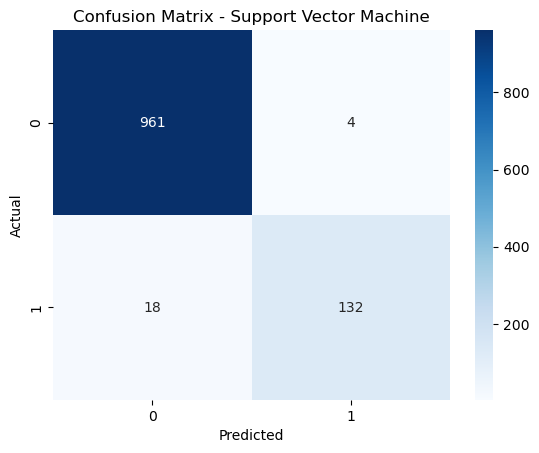

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


df['label'] = df['label'].map({'ham': 0, 'spam': 1})


X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(stop_words='english')
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)


models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": LinearSVC()
}


for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train_tf, y_train)
    y_pred = model.predict(X_test_tf)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

   
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


svm_model = LinearSVC()
svm_model.fit(X_train_tf, y_train)
y_pred_svm = svm_model.predict(X_test_tf)

comparison_df = pd.DataFrame({
    'Message': X_test.values,
    'Actual': y_test.values,
    'Predicted': y_pred_svm
})

print("\n📨 Sample Predictions (First 10 Rows):")
print(comparison_df.head(10))


wrong_preds = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print("\n Wrong Predictions (If Any):")
print(wrong_preds.head())
